# Task-03

 Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.



Sample Dateset :- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("banking.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Assuming 'df' is your DataFrame
df['job'] = label_encoder.fit_transform(df['job'])
df['marital'] = label_encoder.fit_transform(df['marital'])
df['education'] = label_encoder.fit_transform(df['education'])
df['default'] = label_encoder.fit_transform(df['default'])
df['housing'] = label_encoder.fit_transform(df['housing'])
df['loan'] = label_encoder.fit_transform(df['loan'])
df['contact'] = label_encoder.fit_transform(df['contact'])
df['month'] = label_encoder.fit_transform(df['month'])
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])
df['poutcome'] = label_encoder.fit_transform(df['poutcome'])

print(df)


       age  job  marital  education  default  housing  loan  contact  month  \
0       44    1        1          0        1        2     0        0      1   
1       53    9        1          7        0        0     0        0      7   
2       28    4        2          6        0        2     0        0      4   
3       39    7        1          3        0        0     0        0      0   
4       55    5        1          0        0        2     0        0      1   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   59    5        1          3        1        0     2        1      4   
41184   31    3        1          0        1        0     0        1      6   
41185   42    0        2          6        1        2     2        1      6   
41186   48    9        1          5        0        0     2        1      8   
41187   25    8        2          3        0        0     0        1      6   

       day_of_week  ...  campaign  pdays  previous 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [6]:
df.duplicated().sum()

12

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

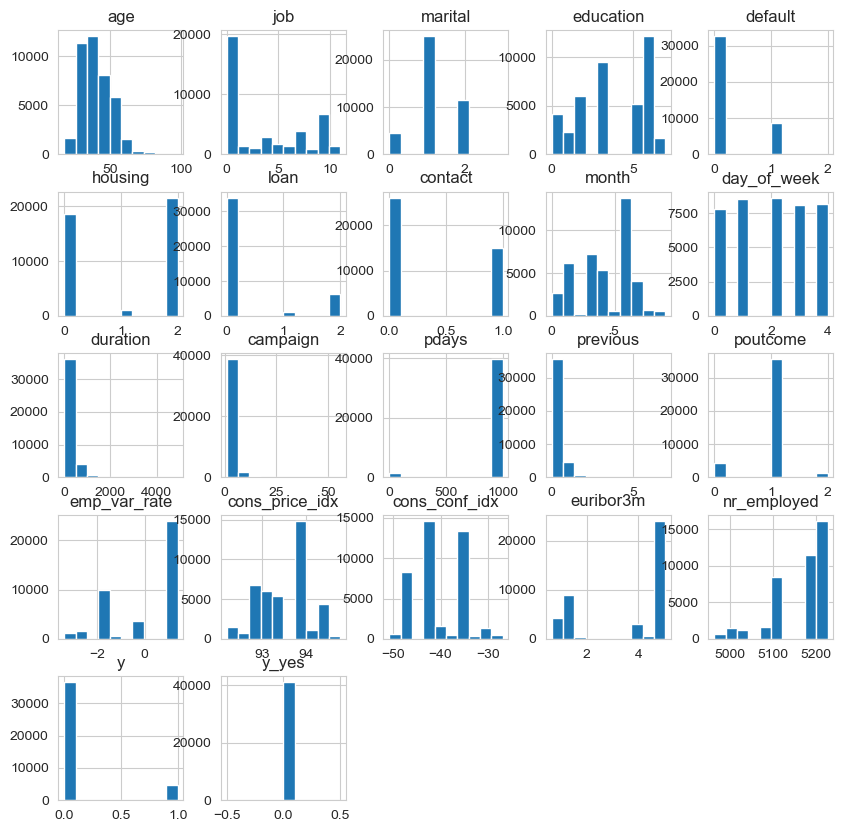

In [31]:
df.hist(figsize=(10, 10))
plt.show()


<Axes: xlabel='y', ylabel='count'>

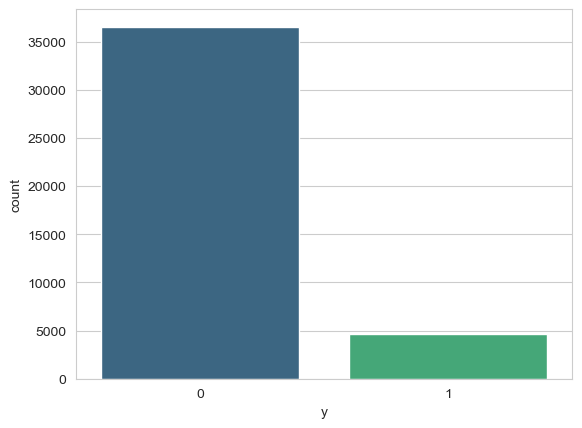

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='y',data=df,palette='viridis')

<Axes: xlabel='emp_var_rate', ylabel='count'>

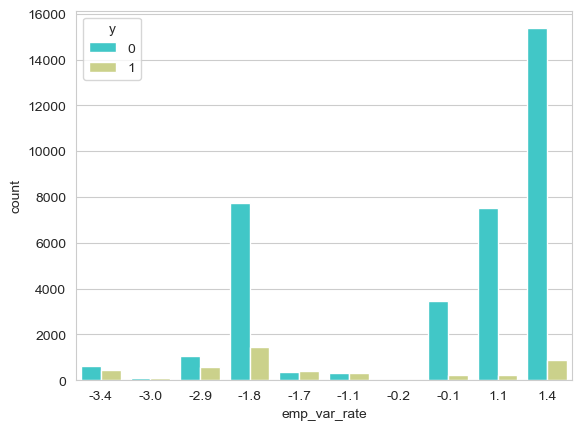

In [10]:
sns.set_style('whitegrid')
sns.countplot(x="emp_var_rate",hue='y',data=df,palette='rainbow')

C:\Users\Nagina Abbas\AppData\Local\Temp\ipykernel_5240\453144951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='age'>

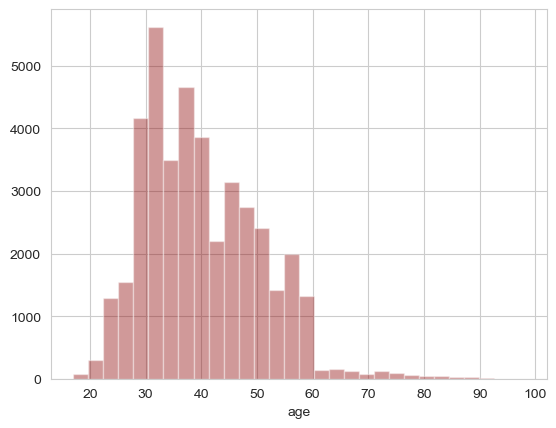

In [11]:
sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=30)

C:\Users\Nagina Abbas\AppData\Local\Temp\ipykernel_5240\2863004444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['nr_employed'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='nr_employed'>

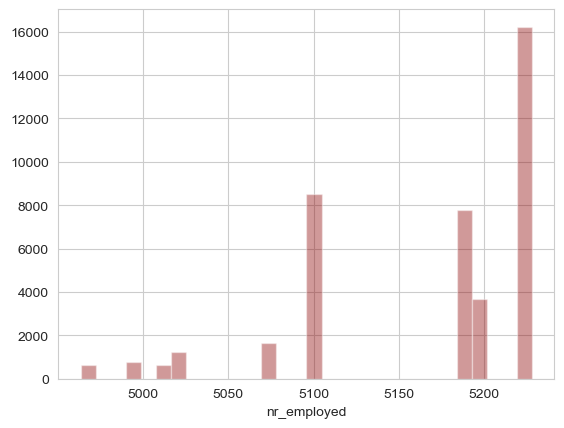

In [12]:
sns.distplot(df['nr_employed'].dropna(),kde=False,color='darkred',bins=30)

<Axes: xlabel='nr_employed', ylabel='count'>

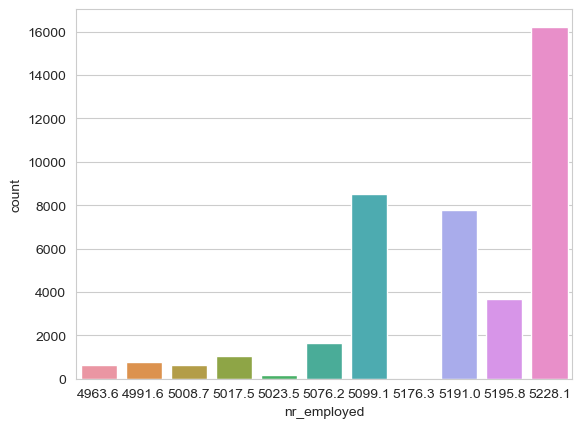

In [13]:
sns.countplot(x='nr_employed',data=df)

<Axes: >

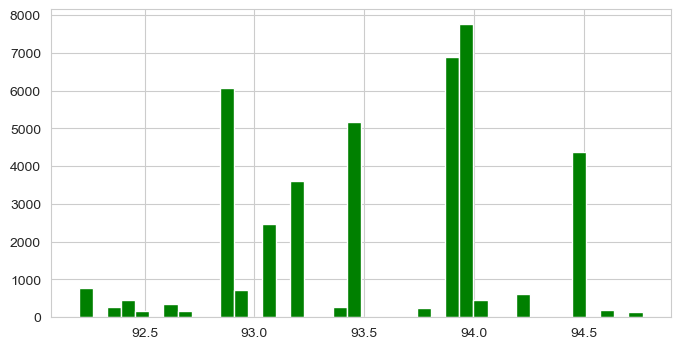

In [14]:
df['cons_price_idx'].hist(color='green',bins=40,figsize=(8,4))

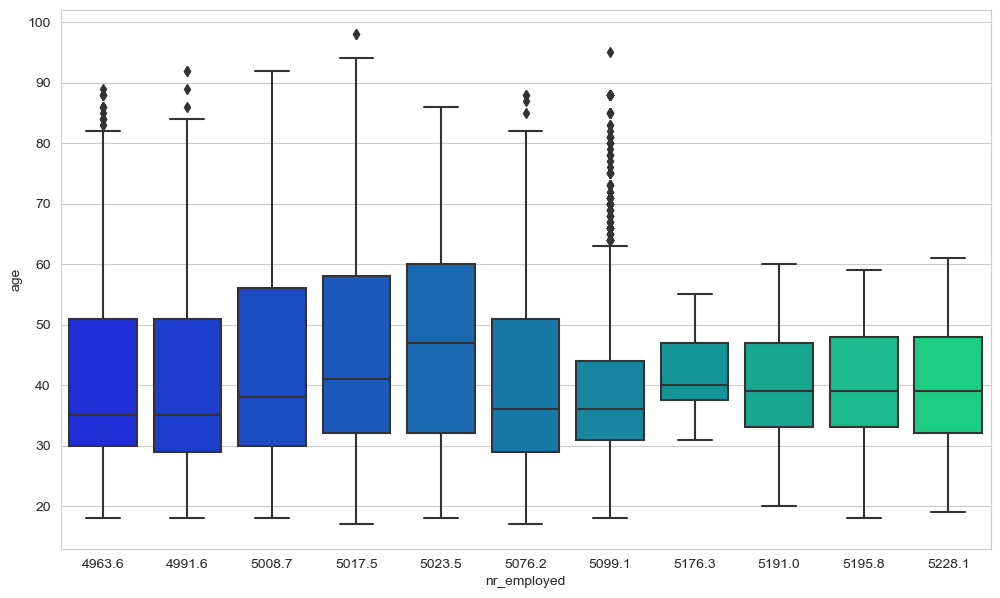

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x='nr_employed', y='age', data=df, palette='winter')
plt.show()


In [16]:
df = df.dropna()
df['y_yes'] = (df['y'] == 'yes').astype(int)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.4, random_state=45)


In [18]:

from sklearn.tree import DecisionTreeClassifier


# Train the decision tree classifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [19]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.889320624127254


In [20]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[13670   924]
 [  899   978]]


In [21]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
     

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14594
           1       0.51      0.52      0.52      1877

    accuracy                           0.89     16471
   macro avg       0.73      0.73      0.73     16471
weighted avg       0.89      0.89      0.89     16471



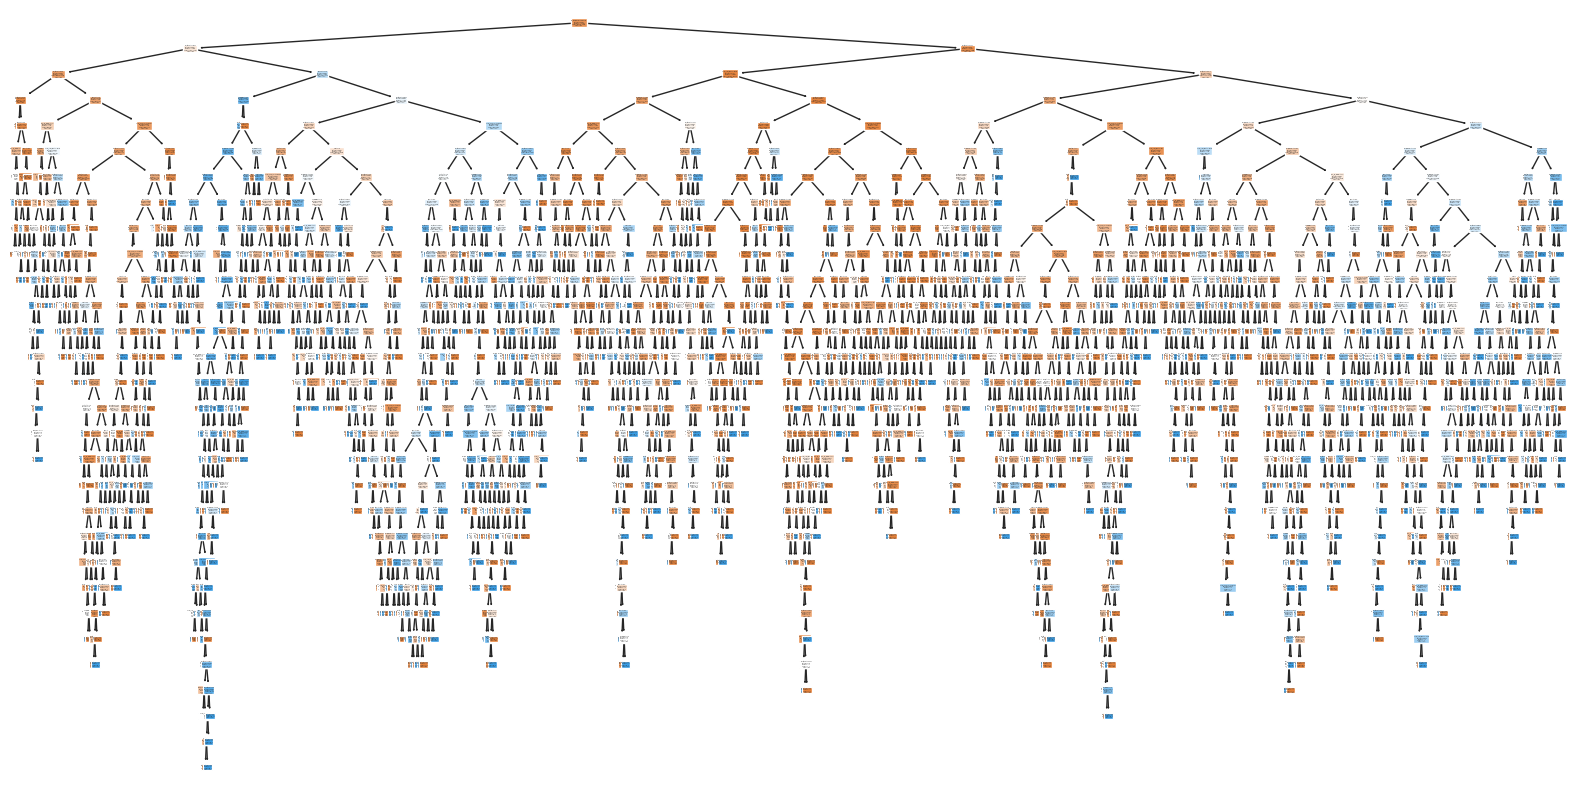

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=df.drop('y', axis=1).columns, class_names=['No', 'Yes'])
plt.show()


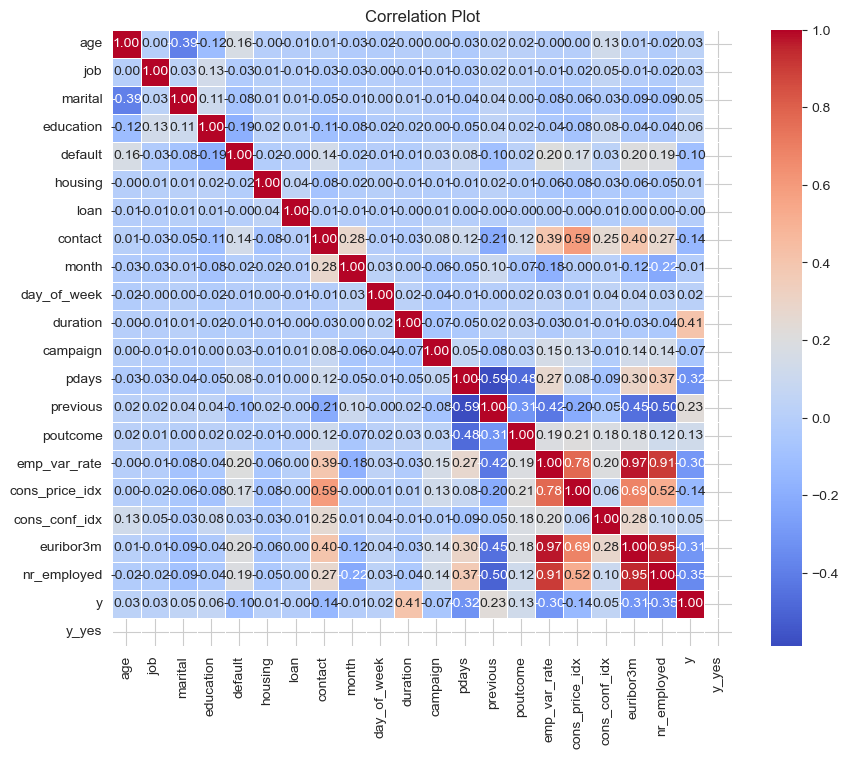

In [29]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()